In [2]:
import random
import csv
import nltk
import requests
import time
import re
import string
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.classify import NaiveBayesClassifier
import nltk
import re
import random
import collections
import csv
from nltk.metrics.scores import (accuracy, precision, recall, f_measure)
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
%pylab inline
from nltk import bigrams, trigrams 
import numpy as np
# Import Bigram finder
from nltk.collocations import BigramCollocationFinder

# Import Bigram metrics - we will use these to identify the top 200 bigrams
from nltk.metrics import BigramAssocMeasures

# Import Bigram finder
from nltk.collocations import TrigramCollocationFinder

# Import Bigram metrics - we will use these to identify the top 200 bigrams
from nltk.metrics import TrigramAssocMeasures

Populating the interactive namespace from numpy and matplotlib


C:\Users\susha\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [111]:
def buildDataSet(jobtitle):    
    dataset = []
    heading = []
    prefix = "https://www.indeed.com"
    infix ="/jobs?q=title%3A("
    postfix = ")&l=UNITED+STATES&jt=fulltime&explvl=entry_level&sort=date&limit=25&start="
    titles_to_remove = ["data scientist", "data analyst", "business analyst", "data architect", "scientist", "analyst", "architect"]
    
    linkList = {}
    duplinkList = []
    
    for titles in jobtitle:                    # iterate over each jobtite
        title = titles.replace(" ","+")
    
        for i in range(0,2000,50):             # scrape first 3 pages of 50 each
            
            url = prefix + infix + title + postfix + str(i)        
            response = requests.get(url).text
            print("----",url)
            # Use BeautifulSoup to parse the webpages
            soup = BeautifulSoup(response, "lxml")            
            #job_blocks =  soup.find_all("a", {'class':"turnstileLink" , 'data-tn-element':"jobTitle"} ) 
            job_blocks = soup.find_all('div', {'data-tn-component':"organicJob"}) 
            for content in job_blocks:
                heading = []
                #href = content.get('href')
                href = content.h2.a.get('href')
                link = prefix + href     
                #print("Link ", link)

                idd = content.h2.get('id')
                #print("id:", idd)

                response = requests.get(link).text
                soup = BeautifulSoup(response, "lxml")
                
                # Code for header
                job_title = soup.find('b', 'jobtitle')                
                #print("Job Title-----" ,job_title)
                
                companyName = soup.find('span', 'company')
                #print("Company----", companyName.replace(".com", ""))        
                
                location = soup.find('span', 'location')
                #print("Location----", location)                  
                
                try:
                    summary_block = soup.find('span', 'summary')
                    desc = summary_block.text
                    words  = word_tokenize(desc.replace('\n',' '))
                    desc = desc.lower()
                    desc = desc.replace('/',' ')
                    desc = desc.replace('.',' ')
                    
                    if job_title.text is not None: 
                        desc = desc.replace(job_title.text,'')
                    
                    if companyName.text is not None: 
                        desc = desc.replace(companyName.text,'')
                    
                    for word in titles_to_remove :
                        desc = desc.replace(word,'') 
                    
                    
                    dataset.append((titles,desc,idd, companyName.text, location.text)) 
                except:
                    print("passed") #Issue with link "https://www.indeed.com/rc/clk?jk=18d31c130b5efff3&fccid=d6ef41e202aa2c0b&vjs=3"
                    pass       
            
    return dataset

In [16]:
jobtitles = ["data scientist", "data analyst", "business analyst", "data architect"]
#dataset = removeDuplicates( buildDataSet(jobtitles) )
#dataset =buildDataSet(jobtitles) 

def removeDuplicates(d):
    # get rid of job postings that have duplicate ids
    de_duped = []
    ids_seen = set()
    for x in d:
        if x[2] not in ids_seen:
            de_duped.append(x)
            ids_seen.add(x[2])
    return de_duped

In [113]:
print(len(dataset))


3982


In [65]:
print(dataset[0])

('data scientist', 'join our motion technologies team and drive innovation that matters! our ever-evolving suite of fitness and activity tracking features in iphone and \uf8ffwatch are helping our users live more active, healthier lives  we are looking for a highly motivated motion  to create cutting edge algorithms that power best in class fitness solutions in a multi-disciplinary team \n\nkey qualifications\nstrong background in engineering mechanics, inertial sensing and signal processing\nworking knowledge of system identification, statistical inference and modeling\nenthusiasm for fitness and health tracking technology\nstrong working knowledge of matlab\ndescription\nkey responsibilities include: designing and validating algorithms using multiple sensors, framing and driving user studies, working with a team to implement algorithms in customer-facing software \n\neducation\nph d mechanical engineering; electrical engineering; computer science or related field with relevant domain

In [114]:
print('Distribution of Job Title & Posts')
print('Data Scientist: ' + str(sum(1 for t in dataset if t[0] == 'data scientist')))
print('Data Analyst: ' + str(sum(1 for t in dataset if t[0] == 'data analyst')))
print('Business Analyst: ' + str(sum(1 for t in dataset if t[0] == 'business analyst')))
print('Data Architect: ' + str(sum(1 for t in dataset if t[0] == 'data architect')))

Distribution of Job Title & Posts
Data Scientist: 986
Data Analyst: 999
Business Analyst: 1000
Data Architect: 997


In [6]:
print(dataset[0])

('data scientist', "eurofins lancaster laboratories, a nationally recognized laboratory, is searching for a  data review to support our pharmaceutical product testing group in lancaster, pa.\n data review responsibilities include, but are not limited to, the following :\nreview simple and complex routine and non-routine data (for three or more areas) according to departmental, corporate, and client sops; read and understand analytical procedures; ensure all work is performed according to glp gmp requirements\nthe ideal candidate would possess :\n strong computer, scientific, and organizational skills\n excellent communication (oral and written) and attention to detail\n ability to work independently and as part of a team, self-motivation, adaptability, and a positive attitude\n ability to learn new techniques, perform multiple tasks simultaneously, keep accurate records, follow instructions, and comply with company policies\nbasic minimum qualifications :\n bachelor's degree in science

In [3]:
#function to clean the data
wordnet_lemmatizer = WordNetLemmatizer()
words_to_remove = ['', 'visa','job','title','401(k)','401k']

#stemmer = PorterStemmer()
    
# Function to clean the data
def cleanData(review):   
    words = word_tokenize(review.replace('\n',' '))
    words = [word.lower() for word in words]
    #words = [word for word in words if not word.isdigit()]
    words = [word for word in words if word not in set(stopwords.words('english'))]
    words = [re.sub(r'[^a-zA-Z ]', '', word) for word in words]
    words = [word for word in words if word not in set(words_to_remove)]
    words = [word for word in words if word not in set(string.punctuation)]
    #stem_list = [stemmer.stem(word) for word in words]
    return words

In [116]:

#write to a csv file
with open("Dataset_April13.csv", 'w', encoding='utf-8', newline='') as csvfile:
    wf = csv.writer(csvfile, delimiter=',',
                            quotechar='"')
    wf.writerow(['JobTitle', 'Description','Dictionary from Description', 'id', 'companyName', 'location'])        # Header at first row
    # what happened to the rest of this function... 
    #lets turn voice on
    
    for (jobtitle, jobdesc, id, companyName, location)  in dataset:
        wf.writerow([jobtitle , jobdesc, cleanData(jobdesc), id, companyName, location ])
       
    csvfile.close()
    print("File created")     
    

File created


In [118]:
pd.read_csv("Purest of the purest 4 13.csv").head()

,JobTitle,Description,Dictionary from Description,id,companyName,location
0,data scientist,"data, data, data… are you naturally curious? l...","['data', 'data', 'data', 'naturally', 'curious...",jl_69dc0962a76185b5,Varen Technologies,"McLean, VA"
1,data scientist,a prominent cybersecurity startup in the heart...,"['prominent', 'cybersecurity', 'startup', 'hea...",jl_a84cd7d7367a118b,MRP,"Washington, DC"
2,data scientist,minimum requirementseducation bs in computer s...,"['minimum', 'requirementseducation', 'bs', 'co...",jl_b49a1570bfbade3d,CLICK IT Staffing,"Louisville, KY"
3,data scientist,systems engineer – senior a dynamic and growin...,"['systems', 'engineer', 'senior', 'dynamic', '...",jl_fa567de465674c1f,Centradyne,"Chantilly, VA"
4,data scientist,we will consider candidates in georgia and new...,"['consider', 'candidates', 'georgia', 'new', '...",jl_c80a681a2b55a183,UNITED PARCEL SERVICE,"Mahwah, NJ 07430"


# For Keywords creation

#with open("Keywords.csv", 'w', encoding='utf-8', newline='') as csvfile.
 #   wf = csv.writer(csvfile, delimiter=',',quotechar='"')
  #  for jobtitle, jobdesc in dataset:
   #     words_list =cleanData(jobdesc)
    #    for w in words_list: 
     #       wf.writerow([w])
    #print("File created")

In [4]:
# read data from saved file (so we don't need to fetch from web every time)
dataset_df = pd.read_csv("Purest of the purest 4 13.csv")
dataset = list( zip(dataset_df.iloc[:, 0], 
                    dataset_df.iloc[:, 1],
                    dataset_df.iloc[:, 3],
                    dataset_df.iloc[:, 4], 
                    dataset_df.iloc[:, 5]
                   ) )

In [5]:
print(len(dataset))

1353


In [123]:
print(dataset[0])

('data scientist', 'data, data, data… are you naturally curious? love numbers? always analyzing things? do you have analytic equations dancing in your head? varen technologies is seeking the best and brightest new generation of technologists who desire to have an impact on matters of national security in the field of data science \n\nwhy work with varen in the cleared community?\n\nmeaningful work – impact the nation’s security\njob security (high demand for clearances)\nbetter wages & benefits (top 10%)\nflexible work schedule\ncareer stability & mobility\n\nno clearance? no problem! we’ll help you clear that hurdle  varen technologies has a unique opportunity to sponsor qualified candidates for high-level us government security clearances in select technical disciplines for our employment opportunities  college juniors rising seniors are encouraged to apply  let us work to help you obtain a clearance by the time you graduate and step into a new varen position upon graduation!\n\njob 

In [6]:
#function to create unigrams, bigrams, ngrams and bag_of_words

def bag_of_words(words):
    return dict([(word, True) for word in words])

# Functions to return a list of bigrams
def bigramReturner (bigrams):
    bigramFeatureVector = []
    for item in bigrams:
        bigramFeatureVector.append(' '.join(item))
    return bag_of_words(bigramFeatureVector)
  
def trigramReturner (trigrams):
    trigramFeatureVector = []
    for item in trigrams:
        trigramFeatureVector.append(' '.join(item))
    return bag_of_words(trigramFeatureVector)

def bag_of_unigrams_words(words):
    return bag_of_words(words)

def bag_of_bigrams_words(words, score_fn=BigramAssocMeasures.chi_sq, n=200):
    bigram_finder = BigramCollocationFinder.from_words(words)
    bigrams = bigram_finder.nbest(score_fn, n)
    return bigramReturner(bigrams)

def bag_of_trigrams_words(words, score_fn3=TrigramAssocMeasures.chi_sq, m=200):
    trigram_finder = TrigramCollocationFinder.from_words(words)
    trigrams = trigram_finder.nbest(score_fn3, m)
    return trigramReturner(trigrams)

def bag_of_ngrams_words(words, score_fn=BigramAssocMeasures.chi_sq, n=200, score_fn3=TrigramAssocMeasures.chi_sq, m=200):
    bigram_finder = BigramCollocationFinder.from_words(words)
    bigrams = bigram_finder.nbest(score_fn, n)
    bigramFeatureVector = []
    for item in bigrams:
        bigramFeatureVector.append(' '.join(item))
    
    trigram_finder = TrigramCollocationFinder.from_words(words)
    trigrams = trigram_finder.nbest(score_fn3, m)
    trigramFeatureVector = []
    for item in trigrams:
        trigramFeatureVector.append(' '.join(item))
    return bag_of_words(words + bigramFeatureVector + trigramFeatureVector)

In [7]:
# Create featured dataset  
ngram_featured_dataset = [(bag_of_ngrams_words(cleanData(dataset[i][1])), dataset[i][0]) for i in range(len(dataset))]
unigram_featured_dataset = [(bag_of_unigrams_words(cleanData(dataset[i][1])), dataset[i][0]) for i in range(len(dataset))]
bigram_featured_dataset = [(bag_of_bigrams_words(cleanData(dataset[i][1])), dataset[i][0]) for i in range(len(dataset))]
trigram_featured_dataset = [(bag_of_trigrams_words(cleanData(dataset[i][1])), dataset[i][0]) for i in range(len(dataset))]

In [132]:
print(len(unigram_featured_dataset))

1353


In [133]:
def train_classifiers(train_Dataset, test_Dataset):
    # make pipeline that does feature selection and then uses MNB
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.feature_selection import chi2, SelectKBest
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.pipeline import Pipeline

    pipeline = Pipeline([('tfidf', TfidfTransformer()),
                         ('chi2', SelectKBest(chi2, k=2000)),
                          ('fs', MultinomialNB())])

    fs_classifier = SklearnClassifier(pipeline)
    fs_classifier.train(train_Dataset)
    print("FS_classifier accuracy percent (test):", (nltk.classify.accuracy(fs_classifier, test_Dataset))*100)

    # For Logistics Regression

    from sklearn.linear_model import LogisticRegression
    from sklearn.pipeline import Pipeline
    pipeline1 = Pipeline([('tfidf', TfidfTransformer()),
                          ('chi2', SelectKBest(chi2, k=2000)),
                           ('lr', LogisticRegression())])

    lr_classifier = SklearnClassifier(pipeline1)

    lr_classifier.train(train_Dataset)
    print("lr_classifier accuracy percent (test):", (nltk.classify.accuracy(lr_classifier, test_Dataset))*100)


    # Train a decision tree model

    from sklearn import tree
    from sklearn.tree import DecisionTreeClassifier

    pipeline2 = Pipeline([('tfidf', TfidfTransformer()),
                          ('chi2', SelectKBest(chi2, k=2000)),
                           ('dt', DecisionTreeClassifier())])

    dt_classifier = SklearnClassifier(pipeline2)
    dt_classifier.train(train_Dataset)
    print("DT_classifier accuracy percent (test):", (nltk.classify.accuracy(dt_classifier, test_Dataset))*100)

    # Train a decision random forest model

    from sklearn.ensemble import RandomForestClassifier
    #from sklearn.ensemble import Random Forest Classifier

    pipeline3 = Pipeline([('tfidf', TfidfTransformer()),
                          ('chi2', SelectKBest(chi2, k=2000)),
                           ('rf', RandomForestClassifier())])

    rf_classifier = SklearnClassifier(pipeline3)
    rf_classifier.train(train_Dataset)
    print("rf_classifier accuracy percent (test):", (nltk.classify.accuracy(rf_classifier, test_Dataset))*100)

    return {
        "fs" : fs_classifier,
        "lr" : lr_classifier,
        "dt" : dt_classifier,
        "rf" : rf_classifier
    }


In [139]:
import random
# Shuffle Datasets and train classifiers
all_classifiers = {}

random.shuffle(unigram_featured_dataset)
print("unigrams:")
train_Dataset, test_Dataset = (unigram_featured_dataset[:int(len(unigram_featured_dataset)*.70)], 
                               unigram_featured_dataset[int(len(unigram_featured_dataset)*.70):])
all_classifiers["unigrams"] = train_classifiers(train_Dataset, test_Dataset)

random.shuffle(bigram_featured_dataset)
print("bigrams:")
train_Dataset, test_Dataset = (bigram_featured_dataset[:int(len(bigram_featured_dataset)*.70)], 
                               bigram_featured_dataset[int(len(bigram_featured_dataset)*.70):])
all_classifiers["bigrams"] = train_classifiers(train_Dataset, test_Dataset)

random.shuffle(trigram_featured_dataset)
print("trigrams:")
train_Dataset, test_Dataset = (trigram_featured_dataset[:int(len(trigram_featured_dataset)*.70)], 
                               trigram_featured_dataset[int(len(trigram_featured_dataset)*.70):])
all_classifiers["trigrams"] = train_classifiers(train_Dataset, test_Dataset)


random.shuffle(ngram_featured_dataset)
print("ngrams:")
train_Dataset, test_Dataset = (ngram_featured_dataset[:int(len(ngram_featured_dataset)*.70)], 
                               ngram_featured_dataset[int(len(ngram_featured_dataset)*.70):])
all_classifiers["ngrams"] = train_classifiers(train_Dataset, test_Dataset)




unigrams:
FS_classifier accuracy percent (test): 70.6896551724138
lr_classifier accuracy percent (test): 73.64532019704434
DT_classifier accuracy percent (test): 65.02463054187191
rf_classifier accuracy percent (test): 68.96551724137932
bigrams:
FS_classifier accuracy percent (test): 37.68472906403941
lr_classifier accuracy percent (test): 37.4384236453202
DT_classifier accuracy percent (test): 50.24630541871922
rf_classifier accuracy percent (test): 52.463054187192114
trigrams:
FS_classifier accuracy percent (test): 35.714285714285715
lr_classifier accuracy percent (test): 35.960591133004925
DT_classifier accuracy percent (test): 41.87192118226601
rf_classifier accuracy percent (test): 42.364532019704434
ngrams:
FS_classifier accuracy percent (test): 46.55172413793103
lr_classifier accuracy percent (test): 50.98522167487685
DT_classifier accuracy percent (test): 55.172413793103445
rf_classifier accuracy percent (test): 62.315270935960584


In [140]:
# defines function for plotting confusion matrix
# copied from scikit learn docs..
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [144]:
def evaluate_classifier( c, classifier_name ):
    true_classes = [x[1] for x in test_Dataset]
    pred_classes = c.classify_many( [x[0] for x in test_Dataset] ) 

    train_true_classes = [x[1] for x in train_Dataset]
    train_pred_classes = c.classify_many( [x[0] for x in train_Dataset]
                                        ) 
    print(classifier_name)
    print("Accuracy percent (test):",nltk.classify.accuracy(c, test_Dataset))
          
    print(classification_report( true_classes, pred_classes))
    
    plot_confusion_matrix( confusion_matrix( true_classes, pred_classes ), 
                          jobtitles, 
                          title = "Confusion matrix for " + classifier_name  )    

In [145]:
all_classifiers["unigrams"].keys()

dict_keys(['fs', 'lr', 'dt', 'rf'])

unigrams: fs
Accuracy percent (test): 0.7832512315270936
                  precision    recall  f1-score   support

business analyst       0.83      0.87      0.85       135
    data analyst       0.69      0.92      0.79       149
  data architect       0.00      0.00      0.00        29
  data scientist       0.97      0.68      0.80        93

     avg / total       0.75      0.78      0.75       406

Confusion matrix, without normalization
[[118  17   0   0]
 [ 12 137   0   0]
 [ 11  16   0   2]
 [  2  28   0  63]]


C:\Users\susha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


unigrams: lr
Accuracy percent (test): 0.8201970443349754
                  precision    recall  f1-score   support

business analyst       0.79      0.90      0.84       135
    data analyst       0.79      0.89      0.84       149
  data architect       0.00      0.00      0.00        29
  data scientist       0.94      0.85      0.89        93

     avg / total       0.77      0.82      0.79       406

Confusion matrix, without normalization
[[121  14   0   0]
 [ 14 133   0   2]
 [ 14  12   0   3]
 [  4  10   0  79]]
unigrams: dt
Accuracy percent (test): 0.8990147783251231
                  precision    recall  f1-score   support

business analyst       0.92      0.89      0.90       135
    data analyst       0.87      0.89      0.88       149
  data architect       0.90      0.93      0.92        29
  data scientist       0.91      0.92      0.92        93

     avg / total       0.90      0.90      0.90       406

Confusion matrix, without normalization
[[120  13   1   1]
 [  8 13

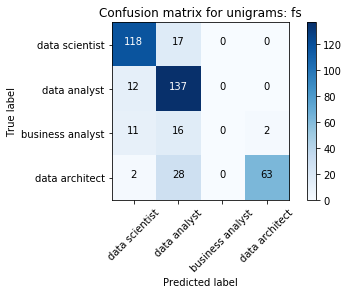

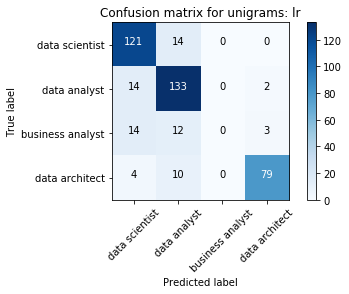

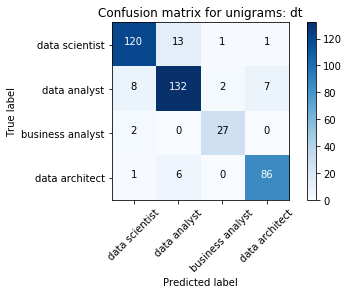

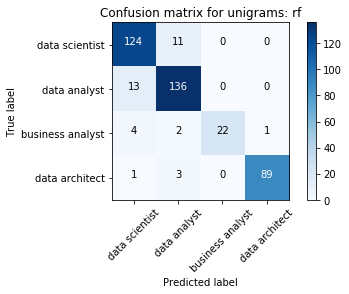

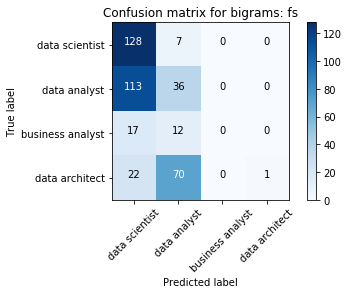

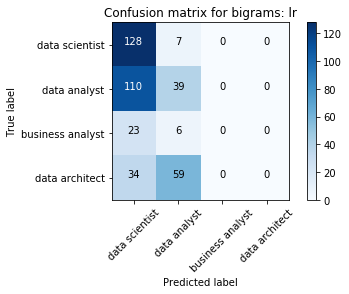

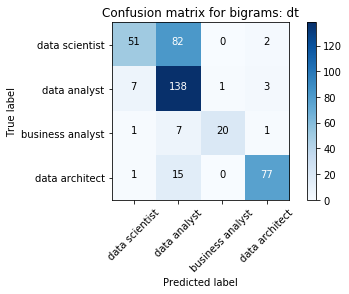

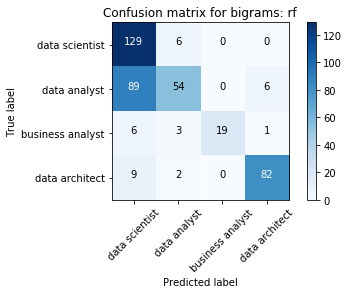

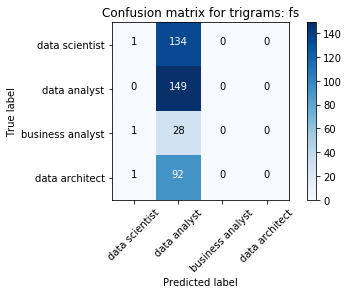

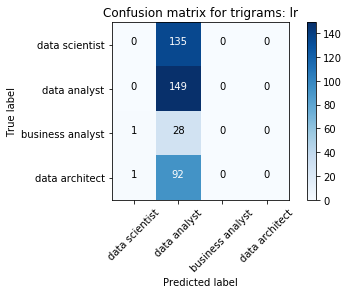

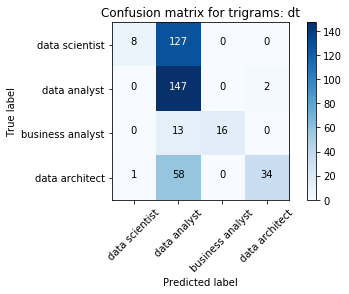

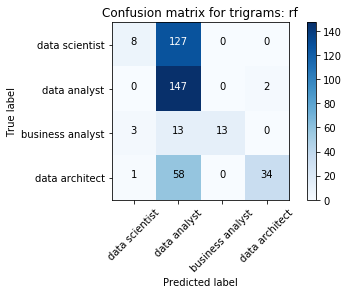

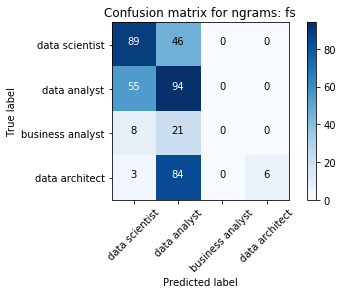

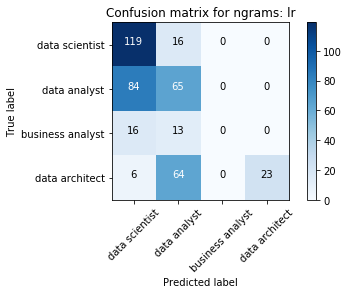

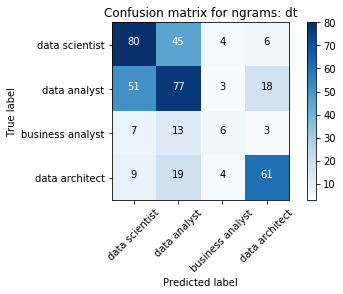

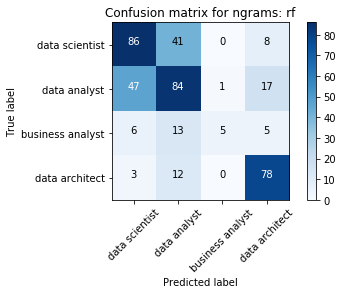

In [146]:
for feature_type in ["unigrams", "bigrams", "trigrams", "ngrams"]:
    for classifier_type in ['fs', 'lr', 'dt', 'rf']:
        evaluate_classifier( all_classifiers[feature_type][classifier_type], 
                            feature_type + ": " + classifier_type )


Decision Tree with feat sel
Accuracy percent (test): 0.8990147783251231
                  precision    recall  f1-score   support

business analyst       0.92      0.89      0.90       135
    data analyst       0.87      0.89      0.88       149
  data architect       0.90      0.93      0.92        29
  data scientist       0.91      0.92      0.92        93

     avg / total       0.90      0.90      0.90       406

Confusion matrix, without normalization
[[120  13   1   1]
 [  8 132   2   7]
 [  2   0  27   0]
 [  1   6   0  86]]


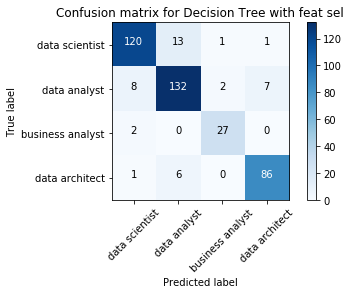

In [178]:
evaluate_classifier( all_classifiers["unigrams"]["dt"], "Decision Tree with feat sel" )

In [148]:
#evaluate_classifier( lr_classifier, "Logistic Regression  wicth feat sel" )

Naive Bayes with feat sel
Accuracy percent (test): 0.7832512315270936
                  precision    recall  f1-score   support

business analyst       0.83      0.87      0.85       135
    data analyst       0.69      0.92      0.79       149
  data architect       0.00      0.00      0.00        29
  data scientist       0.97      0.68      0.80        93

     avg / total       0.75      0.78      0.75       406

Confusion matrix, without normalization
[[118  17   0   0]
 [ 12 137   0   0]
 [ 11  16   0   2]
 [  2  28   0  63]]


C:\Users\susha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


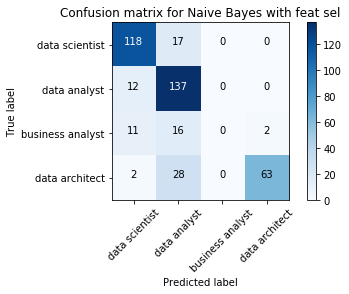

In [179]:
evaluate_classifier( all_classifiers["unigrams"]["fs"], "Naive Bayes with feat sel" )

In [180]:
def top_n_dt(feature_names, clf, class_labels, n):
    """Prints features with the highest coefficient values, per class"""
    #feature_names = vectorizer.get_feature_names()
    top_feats = {}
    for i, class_label in enumerate(class_labels):
        top = np.argsort(clf.coef_[i])[-30:]
        top_feats[class_label] = [feature_names[j] for j in top]
        #print("%s: %s" % (class_label,
        #      " ".join(feature_names[j] for j in top10)))
    return(pd.DataFrame(top_feats))

In [194]:
# make a dataframe that has all the original features extracted by the vectorizer,
# as well as the scores from the feature selection step 
dt_classifier = all_classifiers["unigrams"]["dt"]
dt = dt_classifier._clf.steps[1]
feat_scores = pd.DataFrame( 
    { "word" : dt_classifier._vectorizer.feature_names_, 
      "score" : dt[1].scores_ 
      })
            

In [195]:
# show highest ranked overall features
feat_scores.sort_values("score", ascending=False).head(1000).to_clipboard()

In [196]:
Keywords_Scores=feat_scores.sort_values("score", ascending=False).head(100)#.to_clipboard()
Keywords_Scores.to_csv('Keywords_Scores.csv')

In [183]:
# get selected features in the correct order
list(feat_scores[ feat_scores.score.rank(ascending=False) <= 500 ].word)
dt_feat_names = list(feat_scores[ feat_scores.score.rank(ascending=False) <= 500 ].word)

In [186]:
feat_scores[ feat_scores.score.rank(ascending=False) <=500].word

13                   abdul
20         abilitiesstrong
144               achieves
175          actiondefault
272                 adminl
273                 admins
331              advocates
335                  aegis
426                     ai
452                   akka
470              algorithm
471            algorithmic
472             algorithms
480               aligning
481              alignment
587                   amqp
620              analytics
650                angular
651              angularjs
710                 apache
756                applied
761               applying
765              appraised
825              arhictect
840                    arm
875             artificial
917                   aspx
987               astutely
1026               attempt
1056                auburn
               ...        
14358               valley
14419    vendorsproficient
14425             ventures
14458         veteranowned
14464              vetting
14507       virtualization
1

In [197]:
feat_scores[ feat_scores.score.rank(ascending=False) <=20].word
Keywords_Rank=feat_scores[ feat_scores.score.rank(ascending=False) <=20].word
Keywords_Rank.to_csv('Keywords_Rank.csv')

In [198]:
print(len(dt_feat_names))
print(len(feat_scores))

2000
15066


In [199]:
#top_n_rf(rf_feat_names, rf_classifier._clf.steps[2][1], jobtitles, 20) 
# feat_scores.word
#top_n_lr(feat_scores.word, lr_classifier._clf.steps[2][1], jobtitles, 200) 
lr_classifier = all_classifiers["unigrams"]["lr"]
lr = lr_classifier._clf.steps[1]
lr_feat_scores = pd.DataFrame( 
    { "word" : lr_classifier._vectorizer.feature_names_, 
      "score" : lr[1].scores_ 
      })

lr_feat_names = list(lr_feat_scores[ lr_feat_scores.score.rank(ascending=False, method="first") <= 2000 ].word)
top_n_lr(lr_feat_names, lr_classifier._clf.steps[2][1], jobtitles, 10)

,business analyst,data analyst,data architect,data scientist
0,ca,capture,analytics,meeting
1,deployment,education,spark,facilitate
2,reviews,vba,c,specifications
3,solution,hours,hadoop,management
4,scala,basic,mathematical,il
5,lifecycle,tables,matlab,sales
6,components,daily,methods,regular
7,leadership,correct,big,objectives
8,ssis,ensure,engineering,flow
9,security,detail,applied,recommendations


In [208]:
top_n_lr(lr_feat_names, lr_classifier._clf.steps[2][1], jobtitles, 10).to_csv("Words_Jobtitle.csv")

In [202]:
pd.DataFrame( dataset, columns = ["title", "desc", "id", "co", "loc"] )

,title,desc,id,co,loc
0,data scientist,"data, data, data… are you naturally curious? l...",jl_69dc0962a76185b5,Varen Technologies,"McLean, VA"
1,data scientist,a prominent cybersecurity startup in the heart...,jl_a84cd7d7367a118b,MRP,"Washington, DC"
2,data scientist,minimum requirementseducation bs in computer s...,jl_b49a1570bfbade3d,CLICK IT Staffing,"Louisville, KY"
3,data scientist,systems engineer – senior a dynamic and growin...,jl_fa567de465674c1f,Centradyne,"Chantilly, VA"
4,data scientist,we will consider candidates in georgia and new...,jl_c80a681a2b55a183,UNITED PARCEL SERVICE,"Mahwah, NJ 07430"
5,data scientist,job duties & responsibilities\nbring creativit...,jl_9ab0e15ca7bf4eaa,BlackLine,"Woodland Hills, CA"
6,data scientist,coverent is seeking an energetic and creative ...,jl_5e25d4a6fe8846f4,Coverent,"McLean, VA"
7,data scientist,overview\nas one of the largest mutual insuran...,jl_c5951b5cb114fe31,Sentry Insurance,"Madison, WI 53702"
8,data scientist,position requires a top secret (ts sci) cleara...,jl_0c8c5547c6498530,B4CORP,"McLean, VA"
9,data scientist,comcast brings together the best in media and ...,jl_952176383134b828,Comcast,"Philadelphia, PA 19103"


In [203]:
(pd.DataFrame( dataset, columns = ["title", "desc", "id", "co", "loc"] )).to_csv("Title_Desc_ID_Co_Loc.csv")

In [204]:
#x.pivot_table(index="loc", values="desc", columns="title", aggfunc="count").fillna(0)
pivotTableFile = x.pivot_table(index="loc", values="desc", columns="title", aggfunc="count").fillna(0)
pivotTableFile.to_csv('pivotTableFile.csv')
print(pivotTableFile)

title                        business analyst  data analyst  data architect  \
loc                                                                           
Abbott Park, IL                           1.0           0.0             0.0   
Aberdeen, MD                              0.0           0.0             1.0   
Addison, IL 60101                         0.0           1.0             0.0   
Agoura Hills, CA                          0.0           1.0             0.0   
Alameda, CA                               2.0           0.0             0.0   
Albany, GA                                0.0           1.0             0.0   
Albuquerque, NM                           0.0           0.0             0.0   
Albuquerque, NM 87107                     0.0           1.0             0.0   
Alexandria, VA                            0.0           0.0             1.0   
Alexandria, VA 22310                      0.0           0.0             0.0   
Alexandria, VA 22311                      1.0       

In [205]:
#x.pivot_table(index="co", columns="title", aggfunc="count").fillna(0)["desc"]
Title_Company_Count= x.pivot_table(index="co", columns="title", aggfunc="count").fillna(0)["desc"]
Title_Company_Count.to_csv('Title_Company_Count.csv')
print(Title_Company_Count)

title                                business analyst  data analyst  \
co                                                                    
23andMe                                           0.0           0.0   
3M                                                0.0           0.0   
3coast                                            1.0           0.0   
4 Corner Resources                                1.0           1.0   
6k Systems                                        0.0           1.0   
A+ Mobile Techs                                   1.0           0.0   
A-Line Staffing Solutions                         0.0           1.0   
ABC                                               0.0           1.0   
ABSc                                              0.0           0.0   
ADMIN FOR CHILDREN'S SVCS                         0.0           1.0   
AFL Telecommunications LLC                        0.0           1.0   
AHS Corporate Home Office                         1.0           0.0   
AIC Ta

In [206]:
#x.groupby(["loc","title"]).count().sort_values(by="desc", ascending=False).reset_index()
Location_Title=x.groupby(["loc","title"]).count().sort_values(by="desc", ascending=False).reset_index()#.to_clipboard()
Location_Title.to_csv('Location_Title.csv')
print(Location_Title)

                        loc             title  desc  id  co
0              New York, NY      data analyst    21  21  21
1              New York, NY    data scientist    20  20  20
2              New York, NY  business analyst    16  16  16
3         San Francisco, CA    data scientist    14  14  14
4            Washington, DC      data analyst    13  13  13
5               Chicago, IL  business analyst    12  12  12
6               Chicago, IL    data scientist     9   9   9
7         San Francisco, CA      data analyst     8   8   8
8               Chicago, IL      data analyst     8   8   8
9                McLean, VA    data scientist     8   8   8
10        San Francisco, CA  business analyst     8   8   8
11            St. Louis, MO      data analyst     7   7   7
12              Atlanta, GA      data analyst     6   6   6
13            Sunnyvale, CA    data scientist     6   6   6
14               Denver, CO      data analyst     6   6   6
15               Queens, NY      data an

In [207]:
#x.groupby(["title","co"]).count().sort_values(by="loc", ascending=False).reset_index()#.to_clipboard()
Title_Company_GroupBy=x.groupby(["title","co"]).count().sort_values(by="loc", ascending=False).reset_index()
Title_Company_GroupBy.to_csv("Title_Company_GroupBy.csv")
print(Title_Company_GroupBy)

                 title                                             co  desc  \
0     business analyst                                JP Morgan Chase     6   
1         data analyst                  DEPT OF HEALTH/MENTAL HYGIENE     6   
2     business analyst                              Kaiser Permanente     6   
3     business analyst                                Lockheed Martin     6   
4     business analyst                                   Diverse Lynx     6   
5     business analyst                                            FIS     6   
6       data scientist                                        Averity     5   
7       data scientist                             McKinsey & Company     5   
8       data scientist                         ClearEdge IT Solutions     4   
9         data analyst                                Lockheed Martin     4   
10      data architect                                      Capgemini     4   
11      data scientist                              